# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook for all your work for the final evidence of this course.

# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

# Student information

- Name: Fausto Alejandro Palma Cervantes
- ID: A01639224
- My career: ITC

# Importing libraries

In [900]:
# Import the packages that we will be using
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

# A1 Load your dataset

In [901]:
# url string that hosts our .csv file
url = "A01639224.csv"

# Read the .csv file, store it as a pandas Data Frame and set column names
dataset = pd.read_csv(url)

# Rename first column
dataset = dataset.rename(columns={"Unnamed: 0": "Index"})

# A2 Data Managment

Print the first 7 rows

In [902]:
dataset.head(7)

,Index,x1,x2
0,0,-0.500283,-7.308327
1,1,-7.252604,3.049801
2,2,-4.121700,-8.795906
3,3,-2.962343,3.550907
4,4,-2.837079,-8.055468
5,5,-2.605676,2.422588
6,6,-7.602795,-0.600449


Print the first 4 last rows

In [903]:
dataset.tail(4)

,Index,x1,x2
220,220,-6.142662,0.830078
221,221,-6.225056,1.072266
222,222,-2.350790,-8.653408
223,223,-1.414436,0.121872


How many rows and columns are in your data?

Use the `shape` method

In [904]:
dataset.shape

(224, 3)

Print the name of all columns 

Use the `columns` method

In [905]:
dataset.columns

Index(['Index', 'x1', 'x2'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [906]:
dataset.dtypes

Index      int64
x1       float64
x2       float64
dtype: object

## Questions

### What is the meaning of rows and columns?

1) Rows, also known in this case as indexes, are the horizontal lines of data in the Data Frame, meanwhile the columns are the vertical lines of the Data Frame.

2) For this data in particular the columns represent the x1, x2 and index variables: out of which only x1 and x2 are quantiative. The rows on the other hand, represent the attributes of each of the individual data points.

Print a statistical summary of your columns

In [907]:
dataset.describe()

,Index,x1,x2
count,224.000000,224.000000,224.000000
mean,111.500000,-1.035504,-3.537513
std,64.807407,6.208938,4.503862
min,0.000000,-10.691624,-13.467997
25%,55.750000,-5.274069,-7.714047
50%,111.500000,-3.069764,-3.482262
75%,167.250000,2.276204,0.483285
max,223.000000,13.182518,4.931413


## Questions

### 1) What is the minumum and maximum values of each variable
    The minimum value of the x1 variable is -10.69, while the maximum value is 13.18. On the other hand, the minimum value of the x2 variable is -13.46, whereas the maximum value is 4.93.
    
### 2) What is the mean and standar deviation of each variable
    The mean value of the x1 variable is -1.03 and the mean value of the x2 variable is -3.53. At the same time, the standard deviation of x1 is 6.20, whereas for x2 the standard deviation is 4.50.

### 3) What do the 25%, 50% and 75% represent?
    The percentages in the statistical summary represent the different percentiles of the data. This means that in each of those rows the value of the variable is greater than said percentage of values.

Rename the columns using the same names with capital letters

In [908]:
dataset = dataset.rename(columns={"Index": "INDEX", "x1": "X1", "x2": "X2"})

dataset.head()

,INDEX,X1,X2
0,0,-0.500283,-7.308327
1,1,-7.252604,3.049801
2,2,-4.121700,-8.795906
3,3,-2.962343,3.550907
4,4,-2.837079,-8.055468


Rename the columns to their original names

In [909]:
dataset = dataset.rename(columns={"INDEX": "Index", "X1": "x1", "X2": "x2"})

dataset.head()

,Index,x1,x2
0,0,-0.500283,-7.308327
1,1,-7.252604,3.049801
2,2,-4.121700,-8.795906
3,3,-2.962343,3.550907
4,4,-2.837079,-8.055468


Use two different alternatives to get one of the columns

In [910]:
a = dataset.x1
b = dataset["x2"]

print(a, end='\n\n')
print(b)

0     -0.500283
1     -7.252604
2     -4.121700
3     -2.962343
4     -2.837079
         ...   
219   -2.587571
220   -6.142662
221   -6.225056
222   -2.350790
223   -1.414436
Name: x1, Length: 224, dtype: float64

0     -7.308327
1      3.049801
2     -8.795906
3      3.550907
4     -8.055468
         ...   
219   -3.083335
220    0.830078
221    1.072266
222   -8.653408
223    0.121872
Name: x2, Length: 224, dtype: float64


Get the second and third columns in rows 62 to 72 (slice of the data set)

In [911]:
dataset.loc[62:72, ["x1", "x2"]]

,x1,x2
62,-5.659232,0.164379
63,-6.942446,-0.632737
64,9.120266,-5.668132
65,-2.921856,0.543256
66,-3.736895,-2.273532
67,-3.146570,-8.792103
68,-7.698726,2.318641
69,-2.190783,-6.884594
70,-9.103135,0.316579
71,-1.119237,-9.244213


For the second and third columns, calculate the number of null and not null values and verify that their sums equal the total number of rows

In [912]:
print("Null x1 values:", pd.isnull(dataset.x1).sum())
print("Not null x1 values:", dataset.x1.notnull().sum())
print("Total x1 values:", (pd.isnull(dataset.x1).sum() + dataset.x1.notnull().sum()))

Null x1 values: 0
Not null x1 values: 224
Total x1 values: 224


In [913]:
print("\nNull x2 values:", pd.isnull(dataset.x2).sum())
print("Not null x2 values:", dataset.x2.notnull().sum())
print("Total x2 values:", (pd.isnull(dataset.x2).sum() + dataset.x2.notnull().sum()))


Null x2 values: 0
Not null x2 values: 224
Total x2 values: 224


Discard the first column

In [914]:
dataset.drop("Index", axis=1, inplace = True)
dataset

,x1,x2
0,-0.500283,-7.308327
1,-7.252604,3.049801
2,-4.121700,-8.795906
3,-2.962343,3.550907
4,-2.837079,-8.055468
...,...,...
219,-2.587571,-3.083335
220,-6.142662,0.830078
221,-6.225056,1.072266
222,-2.350790,-8.653408


## Questions 

### Based on the previous results, provide a description of your dataset

    The dataset, consisting of 224 data points, represents some type of measurable natural phenomena. The dataset has no null values and the values for both variables range from negative to positive.

# A3 Data visualization

In the same figure plot the histogram of the first two variables

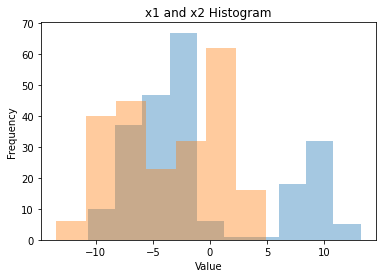

In [915]:
sns.distplot(dataset["x1"], kde=False)
dfhist = sns.distplot(dataset["x2"], kde=False)
dfhist.set_title("x1 and x2 Histogram")
dfhist.set_xlabel("Value")
dfhist.set_ylabel("Frequency")

plt.show()

## Questions

### Based on these two plots, provide a description of your data:

    The figure above shows the frequency of values in the dataset for both variables. The blue histogram represents the frequency of values in the x1 variable whereas the orange histogram demonstrates the frequency of values in the x2 variable.

In the same figure plot the boxplot of the first two variables

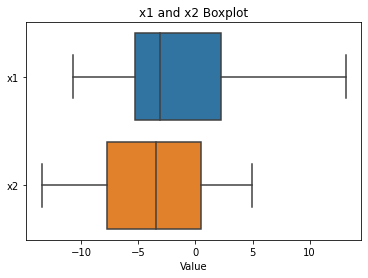

In [916]:
x1andx2 = dataset.loc[:, ["x1", "x2"]]
x2bp = sns.boxplot(data=x1andx2, orient="h")
x2bp.set_title("x1 and x2 Boxplot")
x2bp.set_xlabel("Value")

plt.show()

Create a scatter plot for the first two variables

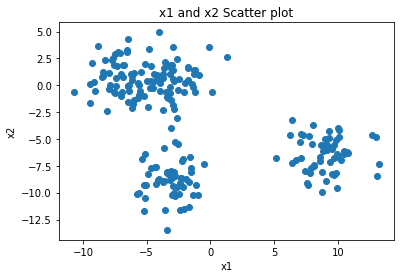

In [917]:
plt.scatter(dataset.x1,dataset.x2)
plt.title("x1 and x2 Scatter plot")
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

## Questions 

### Based on the previous results, provide a description of your dataset

    The two figures above show different properties of the selected dataset. The boxplot shows both the range of values and mean of the two variables in the dataset. The scatter plot however, shows the distribution of the dataset values by using the x1 variable as the x-axis and the x2 variable as the y-axis.

# A4 K-means

Do K-means clustering defining a number of clusters appropiate for your scatter plot

In [918]:
# Define number of clusters
K = 3
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['x1','x2']])

Add a column with the assigned clusters of each data point to your dataset

In [919]:
# Add a new column to the dataset with the cluster information
dataset['ClusterInfo'] = yp
dataset

,x1,x2,ClusterInfo
0,-0.500283,-7.308327,2
1,-7.252604,3.049801,0
2,-4.121700,-8.795906,2
3,-2.962343,3.550907,0
4,-2.837079,-8.055468,2
...,...,...,...
219,-2.587571,-3.083335,0
220,-6.142662,0.830078,0
221,-6.225056,1.072266,0
222,-2.350790,-8.653408,2


Print the number associated to each cluster

In [920]:
dataset.ClusterInfo.unique()

array([2, 0, 1], dtype=int32)

Print the centroids

In [921]:
km.cluster_centers_

array([[-5.02331542,  0.6094776 ],
       [ 9.01513599, -6.40319255],
       [-3.14408035, -8.79782527]])

Print the intertia metric

In [922]:
km.inertia_

1498.831633762387

Create a scatter plot of your data assigned to its corresponding cluster and centroid

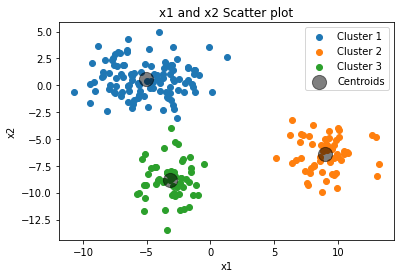

In [923]:
df0 = dataset[dataset.ClusterInfo==0]
df1 = dataset[dataset.ClusterInfo==1]
df2 = dataset[dataset.ClusterInfo==2]

plt.scatter(df0.x1, df0.x2, Label='Cluster 1')
plt.scatter(df1.x1, df1.x2, Label='Cluster 2')
plt.scatter(df2.x1, df2.x2, Label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title("x1 and x2 Scatter plot")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

## Questions 

### Provide a detailed description of your results

        Having already created a scatter plot that shows the distribution of the dataset values, the scatter plot above also respresents the same dataset graphically. The difference in this dataset is the use of the K-means clustering algorithm to divide the data points into clusters based on their attributes (variables) and also the visual representation of the centroids in said clusters.

# A4 Elbow plot

Create the corresponding Elbow plot

In [924]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['x1','x2']])
    sse.append(km.inertia_)

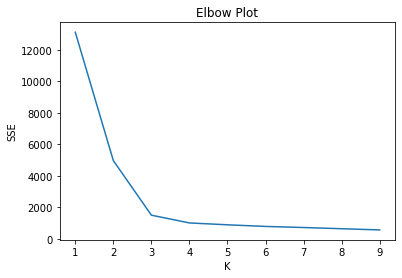

In [925]:
plt.plot(k_rng,sse)

plt.title('Elbow Plot')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

## Questions 

### What is the best number of clusters K? (argue your response)
    Elbow plots are used to help determine the best k-value to use when doing K-means clustering. The k-value represents the number of clusters to consider when dividing the data through the algorithm. An elbow plot shows the ideal number of clusters through its inflection point, which is where the graph would appear to have an "elbow".

### Does this number of clusters agree with your inital guess? (argue your response)
    Yes, the number of cluster does agree with my initial guess, since I used the scatter plot do guess the amount of clusters, my initial guess was an educated guess. When looking at the scatter plot you can tell that there are three clearly defined separate areas with a high density of data points, this observation was what led me to my initial guess of 3 clusters.

# A4 Normalizing the data: preprocessing using the min max scaler

Normalize the data using the min max scaler

In [926]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(dataset[['x1']])
dataset['x1'] = scaler.transform(dataset[['x1']])

scaler.fit(dataset[['x2']])
dataset['x2'] = scaler.transform(dataset[['x2']])

dataset

,x1,x2,ClusterInfo
0,0.426878,0.334775,2
1,0.144048,0.897735,0
2,0.275190,0.253926,2
3,0.323751,0.924970,0
4,0.328998,0.294169,2
...,...,...,...
219,0.339449,0.564402,0
220,0.190539,0.777094,0
221,0.187088,0.790257,0
222,0.349367,0.261671,2


Print a statistical summary of the normalized data in your columns

In [927]:
dataset.describe()

,x1,x2,ClusterInfo
count,224.000000,224.000000,224.000000
mean,0.404459,0.539718,0.758929
std,0.260070,0.244783,0.833659
min,0.000000,0.000000,0.000000
25%,0.226921,0.312725,0.000000
50%,0.319252,0.542720,1.000000
75%,0.543175,0.758246,2.000000
max,1.000000,1.000000,2.000000


## Questions

### 1) What is the minumum and maximum values of each variable
    Normalizing the data helps scale the points so that they all lie in the interval between 0 and 1. That being said, the minimum value of both variables is 0, while the maximum is 1.
    
### 2) What is the mean and standar deviation of each variable
    The mean value of the x1 variable is 0.40, while the mean value of the x2 variable is 0.53. At the same time, the standard deviation of x1 is 0.26, whereas for x2 the standard deviation is 0.24.

### 3) What do the 25%, 50% and 75% represent?
    The percentages in the statistical summary represent the different percentiles of the data. This means that in each of those rows the value of the variable is greater than said percentage of values.
    
### 4) Are the minimum and maximum values equal to your original data?
    As already mentioned, normalizing the data scales the point so that they all lie in the interval between 0 and 1. Because of this, the minimum and maximum values of the scaled data are not equal to those of the original data. This is because the minimum and maximum values of scaled data will always be 0 and 1 respectively.

Create a scatter plot of your normalized data

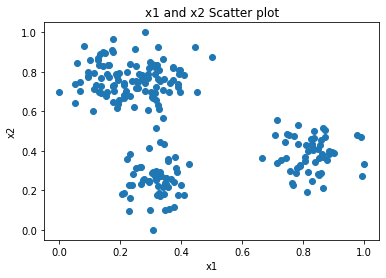

In [928]:
plt.scatter(dataset.x1,dataset.x2)
plt.title("x1 and x2 Scatter plot")
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

Do K-means clustering basing the number of clusters on your scatter plot

In [929]:
# Define number of clusters
K = 3
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['x1','x2']])

Add to your dataset a column with the assigned cluster to each data point

In [930]:
# Add a new column to the dataset with the cluster information
dataset['ClusterInfo'] = yp
dataset

,x1,x2,ClusterInfo
0,0.426878,0.334775,2
1,0.144048,0.897735,0
2,0.275190,0.253926,2
3,0.323751,0.924970,0
4,0.328998,0.294169,2
...,...,...,...
219,0.339449,0.564402,0
220,0.190539,0.777094,0
221,0.187088,0.790257,0
222,0.349367,0.261671,2


Print the centroids

In [931]:
km.cluster_centers_

array([[0.23813364, 0.76286469],
       [0.8254437 , 0.38396909],
       [0.31612637, 0.24917178]])

Print the intetia metric

In [932]:
km.inertia_

3.3218649870210313

Create a scatter plot of your data assigned to its corresponding cluster and centroid

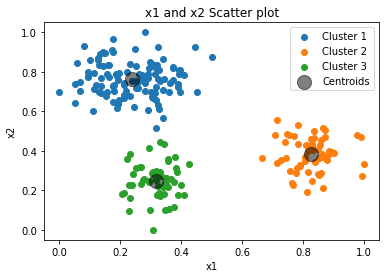

In [933]:
df0 = dataset[dataset.ClusterInfo==0]
df1 = dataset[dataset.ClusterInfo==1]
df2 = dataset[dataset.ClusterInfo==2]

plt.scatter(df0.x1, df0.x2, Label='Cluster 1')
plt.scatter(df1.x1, df1.x2, Label='Cluster 2')
plt.scatter(df2.x1, df2.x2, Label='Cluster 3')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title("x1 and x2 Scatter plot")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

## Questions 

### Provide a detailed description of your results. Does the normalization improve the clustering?
    Normalization does not significantly improve clustering, it doesn't really make much of a difference in the resulting scatter plots. There is erroneous clusterization in the areas of overlaping data with both types of data. My prediction would be that with there being more points normalization would make a more significant difference.

# BONUS

1) Generate some data using the "make_blobs" function from "sklearn.datasets"

- The number of observations is equal to the three last digits in your ID
- 2 variables
- 4 clusters
- Standar deviation of each cluster of 1.5

In [934]:
from sklearn.datasets import make_blobs
coords, clusters = make_blobs(n_samples=224, n_features=2, centers=4, cluster_std=1.5) 
dataset_bonus = pd.DataFrame(data=coords, columns=["x1", "x2"])
dataset_bonus['ClusterInfo'] = clusters

dataset_bonus

,x1,x2,ClusterInfo
0,0.521833,7.010533,0
1,-0.835581,6.868563,0
2,0.659766,8.399078,0
3,1.479244,7.532168,0
4,-7.677171,8.161590,1
...,...,...,...
219,7.920921,8.223795,3
220,-7.871642,6.662361,1
221,2.263946,2.123133,2
222,-1.069554,1.120733,2


2) Create a scatter plot of your data using the real cluster labels

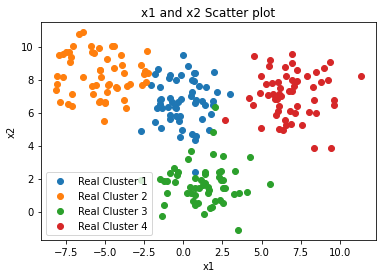

In [935]:
df0 = dataset_bonus[dataset_bonus.ClusterInfo==0]
df1 = dataset_bonus[dataset_bonus.ClusterInfo==1]
df2 = dataset_bonus[dataset_bonus.ClusterInfo==2]
df3 = dataset_bonus[dataset_bonus.ClusterInfo==3]

plt.scatter(df0.x1, df0.x2, Label='Real Cluster 1')
plt.scatter(df1.x1, df1.x2, Label='Real Cluster 2')
plt.scatter(df2.x1, df2.x2, Label='Real Cluster 3')
plt.scatter(df3.x1, df3.x2, Label='Real Cluster 4')

plt.title("x1 and x2 Scatter plot")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

3) Do K-means clustering 

In [936]:
# Define number of clusters
K = 4
km = KMeans(n_clusters=K)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset_bonus[['x1','x2']])

# Add a new column to the dataset with the cluster information
dataset_bonus['KClusterInfo'] = yp

dataset_bonus

,x1,x2,ClusterInfo,KClusterInfo
0,0.521833,7.010533,0,3
1,-0.835581,6.868563,0,3
2,0.659766,8.399078,0,3
3,1.479244,7.532168,0,3
4,-7.677171,8.161590,1,1
...,...,...,...,...
219,7.920921,8.223795,3,0
220,-7.871642,6.662361,1,1
221,2.263946,2.123133,2,2
222,-1.069554,1.120733,2,2


4) Create a scatter plot of your data using the estimated cluster labels

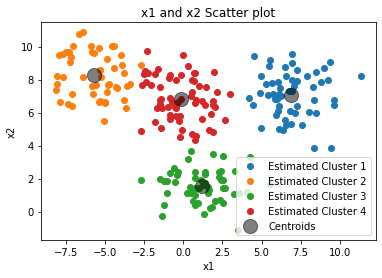

In [937]:
df0 = dataset_bonus[dataset_bonus.KClusterInfo==0]
df1 = dataset_bonus[dataset_bonus.KClusterInfo==1]
df2 = dataset_bonus[dataset_bonus.KClusterInfo==2]
df3 = dataset_bonus[dataset_bonus.KClusterInfo==3]

plt.scatter(df0.x1, df0.x2, Label='Estimated Cluster 1')
plt.scatter(df1.x1, df1.x2, Label='Estimated Cluster 2')
plt.scatter(df2.x1, df2.x2, Label='Estimated Cluster 3')
plt.scatter(df3.x1, df3.x2, Label='Estimated Cluster 4')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='k', marker='o', label='Centroids', s=200, alpha=0.5)

plt.title("x1 and x2 Scatter plot")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()

plt.show()

### Questions 

### Provide a detailed description of your results.
    The scatter plot above shows the estimated clusters created using the k-means clustering algorithmn on a randomly generated dataset. Each time the file is run the randomly generated dataset creates different results, but in general the algorithms groups the data points into estimated clusters that are pretty accurate to the real clusters. The only problems the algorithm runs into are caused by cases in which the generated dataset creates overlapping clusters. In these cases the results are pretty accurate except for the areas in which clusters overlap.

# Descipción de tu percepción del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables

Escribe tu descripción del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

    Aprendí a identificar variables cuantitativas y categóricas para posteriormente utilizarlas para crear modelos con los que se puedan agrupar datos de características similares utilizando el método de K-medias. Además de aprender a graficar el conjunto de datos mediante un gráfico de dispersión y algunas de sus propiedades como su su rango y frecuencia de valores utilizando diagramas de caja e histogramas, aprendí a utilizar "diagramas de codo" con los cuales se puede determinar el número de grupos más apropiado para considerar al momento de utilizar el método de K-medias.

Escribe tu descripción del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

    Sé utilizar funciones de las librerias de Python pandas, matplotlib, numpy, seaborn y sklearn para construir modelos que puedan representar diferentes atributos del conjunto de datos y con los que se pueden explicar diferentes comportamientos del fenómeno natural del cual se tienen los datos. También sé utilizar los métodos de de las librerias para ejecutar el algoritmo de K-means de una manera no supervisada. Por último, para leer datos externo sé importar un archivo .csv y convertir su información en una estructura de datos tipo DataFrame, así como accesar a datos en GitHub desde la terminal local de mi computadora. 